# Community Detection using DeepWalk and K-Means
This notebook performs **community detection** on a given graph using **DeepWalk embeddings** and **K-Means clustering**. The main steps include:
- Loading the graph from an edge list
- Performing random walks to generate node sequences
- Training a **Word2Vec** model on these sequences to generate node embeddings
- Clustering nodes using **K-Means**
- Evaluating the clustering using **Silhouette Score**
- Visualizing the communities

## 1. Importing Required Libraries
We use the following libraries:
- `networkx` for graph processing
- `numpy` for numerical operations
- `matplotlib` for visualization
- `sklearn.cluster.KMeans` for clustering
- `sklearn.metrics.silhouette_score` for evaluation
- `gensim.models.Word2Vec` for training DeepWalk embeddings

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec

## 2. Loading the Graph
The graph is loaded from an edge list file, where each line represents an edge in the format: `node1 node2`. We use `networkx` to construct the graph.

In [2]:
def load_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        edges = [tuple(map(int, line.strip().split())) for line in file]
    graph = nx.Graph()
    graph.add_edges_from(edges)
    print(f'Graph Loaded: {graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges')
    return graph

## 3. Performing Random Walks
Random walks generate sequences of nodes by traversing the graph. These sequences are used as input for DeepWalk training.

In [5]:
def random_walk(graph, start_node, walk_length):
    walk = [start_node]
    for _ in range(walk_length - 1):
        cur = walk[-1]
        neighbors = list(graph.neighbors(cur))
        if len(neighbors) == 0:
            break
        walk.append(np.random.choice(neighbors))
    return walk

In [6]:
def perform_random_walks(graph, walk_length=30, num_walks=10):
    walks = []
    nodes = list(graph.nodes())
    for _ in range(num_walks):
        np.random.shuffle(nodes)
        for node in nodes:
            walk = random_walk(graph, start_node=node, walk_length=walk_length)
            walks.append(walk)
    return walks

## 4. Training DeepWalk Model
DeepWalk is trained using **Word2Vec** to generate node embeddings.

In [7]:
def train_deepwalk(walks, dimensions=64, window_size=5, workers=4):
    walks = [[str(node) for node in walk] for walk in walks]
    model = Word2Vec(walks, vector_size=dimensions, window=window_size, min_count=0, sg=1, workers=workers)
    embeddings = {int(node): model.wv[node] for node in model.wv.index_to_key}
    return embeddings

## 5. Clustering with K-Means
The embeddings are clustered using **K-Means** to detect communities.

In [8]:
def perform_kmeans_clustering(embeddings, num_clusters):
    embedding_matrix = np.array([embeddings[node] for node in sorted(embeddings.keys())])
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix)
    return labels, kmeans

## 6. Evaluating Clustering
The **Silhouette Score** measures the quality of clustering.

In [9]:
def evaluate_clustering(embeddings, labels):
    embedding_matrix = np.array([embeddings[node] for node in sorted(embeddings.keys())])
    silhouette_avg = silhouette_score(embedding_matrix, labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
    return silhouette_avg

## 7. Finding Optimal Cluster Count
The optimal number of clusters is chosen by maximizing the Silhouette Score.

In [10]:
def optimize_kmeans_clustering(graph, embeddings, max_no_improvement=3, threshold=0.01):
    max_silhouette_score = -1
    prev_silhouette_score = -1
    no_improvement_count = 0
    best_community_count = 0
    best_labels = None
    for num_clusters in range(2, graph.number_of_nodes()):
        labels, _ = perform_kmeans_clustering(embeddings, num_clusters)
        current_silhouette_score = evaluate_clustering(embeddings, labels)
        if current_silhouette_score > max_silhouette_score:
            max_silhouette_score = current_silhouette_score
            best_labels = labels
            best_community_count = num_clusters
            no_improvement_count = 0
        else:
            if abs(current_silhouette_score - prev_silhouette_score) < threshold:
                no_improvement_count += 1
        if no_improvement_count >= max_no_improvement:
            print(f'Stopping: No significant improvement after {max_no_improvement} iterations.')
            break
    return best_labels, best_community_count

## 8. Visualizing Communities 


In [12]:
def visualize_communities(graph, labels, title="DeepWalk Community Detection"):
    """
    Visualize graph communities with a spring layout.
    """
    print("Visualizing communities...")
    pos = nx.spring_layout(graph, seed=42)
    unique_labels = set(labels)
    colors = plt.cm.tab20(range(len(unique_labels)))
    node_colors = [colors[labels[i]] for i in range(len(labels))]

    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, node_color=node_colors, with_labels=True, node_size=500, alpha=0.9, font_size=10)
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

## 9. Running the Pipeline

Graph Loaded: 50 nodes, 66 edges
Silhouette Score: 0.2701
Silhouette Score: 0.2769
Silhouette Score: 0.2967
Silhouette Score: 0.3386
Silhouette Score: 0.3694
Silhouette Score: 0.3850
Silhouette Score: 0.3700
Silhouette Score: 0.3757
Silhouette Score: 0.3991
Silhouette Score: 0.4225
Silhouette Score: 0.4216
Silhouette Score: 0.4016
Silhouette Score: 0.3822
Silhouette Score: 0.3522
Silhouette Score: 0.3089
Silhouette Score: 0.3013
Silhouette Score: 0.3201
Silhouette Score: 0.3295
Silhouette Score: 0.3232
Silhouette Score: 0.2750
Silhouette Score: 0.2720
Silhouette Score: 0.2798
Silhouette Score: 0.2722
Silhouette Score: 0.2549
Silhouette Score: 0.2488
Silhouette Score: 0.2363
Silhouette Score: 0.2191
Silhouette Score: 0.2267
Silhouette Score: 0.2032
Silhouette Score: 0.1980
Silhouette Score: 0.1962
Silhouette Score: 0.1840
Silhouette Score: 0.1682
Silhouette Score: 0.1689
Silhouette Score: 0.1553
Silhouette Score: 0.1272
Silhouette Score: 0.1220
Silhouette Score: 0.1166
Silhouette Score:

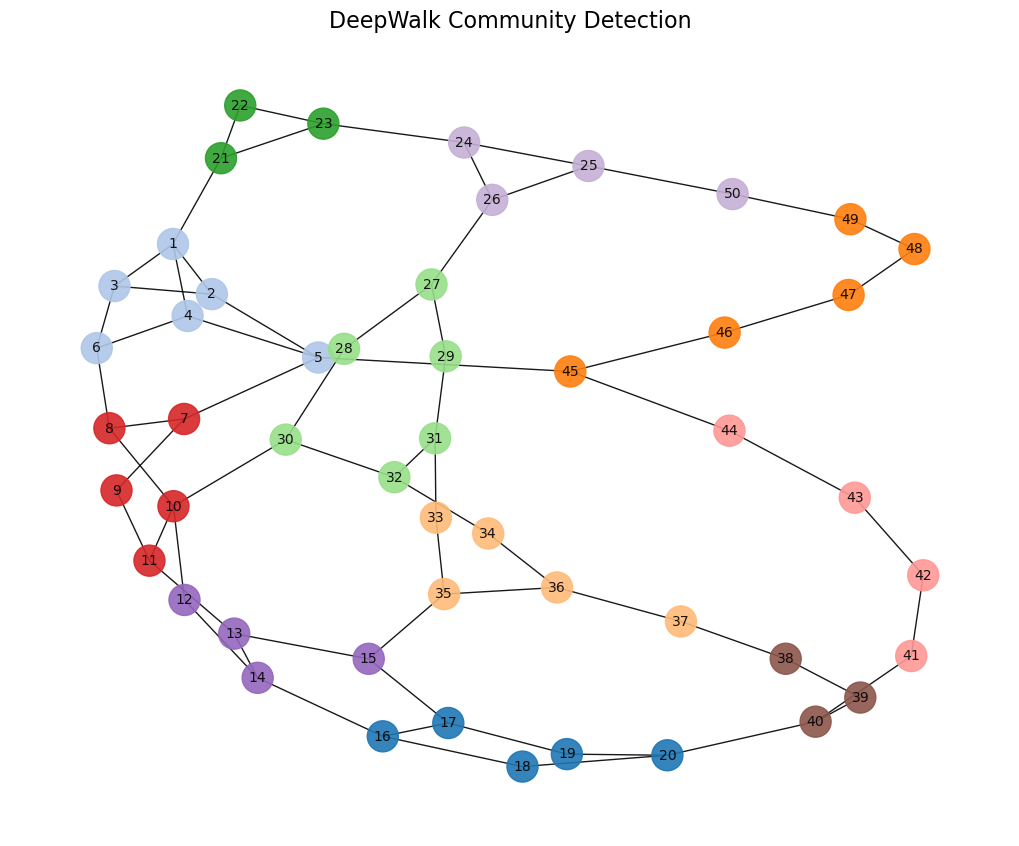

In [17]:
file_path = "sample-graph (50).txt"
graph = load_graph_from_file(file_path)
walks = perform_random_walks(graph)
embeddings = train_deepwalk(walks)
best_labels, best_community_count = optimize_kmeans_clustering(graph, embeddings)
evaluate_clustering(embeddings, best_labels)
print(f"Clustering into {best_community_count} communities")
visualize_communities(graph, best_labels)